# EDA on IPL dataset (Task 5)

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, precision_recall_curve
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
data = pd.read_csv("matches.csv")
Data = pd.read_csv("deliveries.csv")
data.head(7)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
Data.head(7)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN


In [4]:
each_season_data=data[['id','season','winner']]
merge_data=Data.merge(each_season_data,how='inner',left_on='match_id',right_on='id')

In [5]:
merge_data.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,0,1,1,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,1,0,1,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,4,0,4,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,1,NaN,NaN,NaN,1,2017,Sunrisers Hyderabad


final_matches=data.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

# Winners season-wise

In [6]:
final_matches=data.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


# Total IPL Championships till 2019

In [7]:
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Deccan Chargers          1
Rajasthan Royals         1
Name: winner, dtype: int64

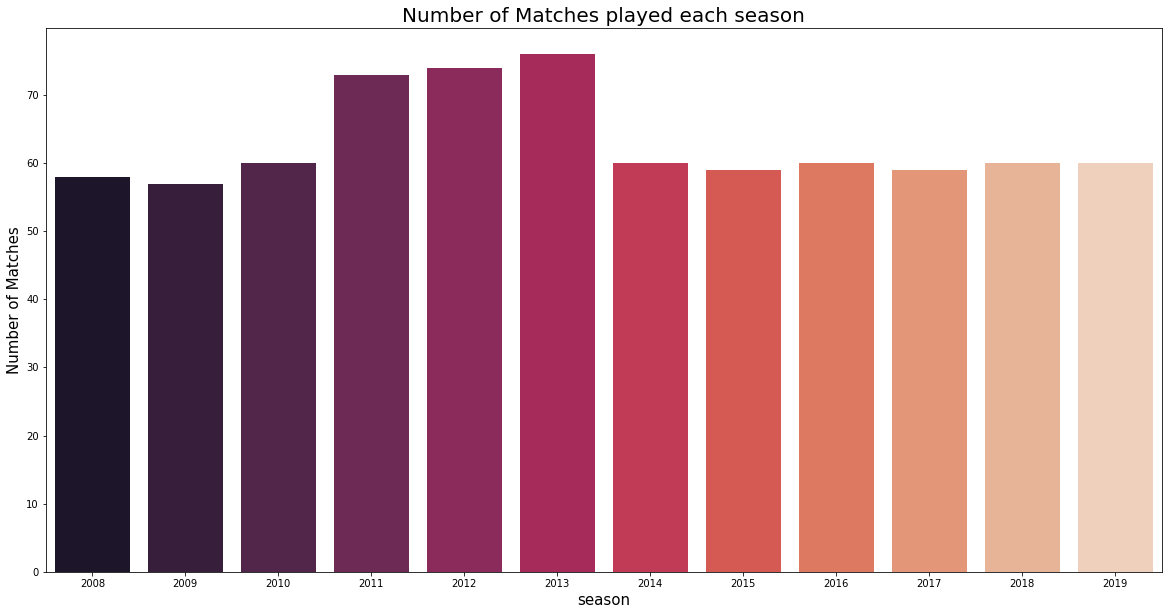

In [8]:
plt.figure(figsize = (20,10))
sns.countplot('season',data=data,palette="rocket")
plt.title("Number of Matches played each season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.show()

# Percentage Wins on batting/bowling first

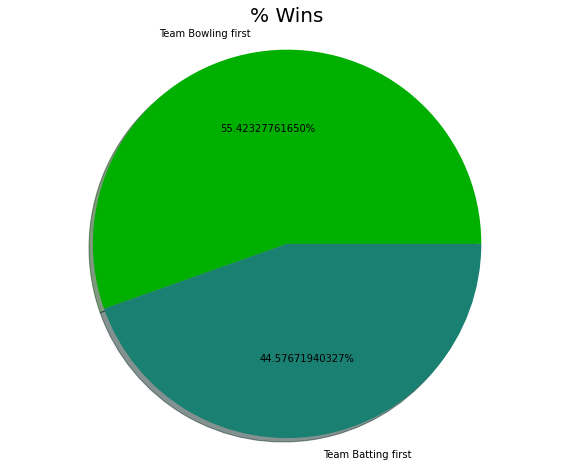

In [9]:
data['win_by']=np.where(data['win_by_runs']>0,'Team Batting first','Team Bowling first')
Win=data.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#00B000', '#1A8072']
sns.color_palette("crest", as_cmap=True)
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.11f%%', shadow=True,startangle=0)
plt.title('% Wins',fontsize=20)
plt.axis('equal')
plt.show()

# Total matches won by teams batting/bowling first each season

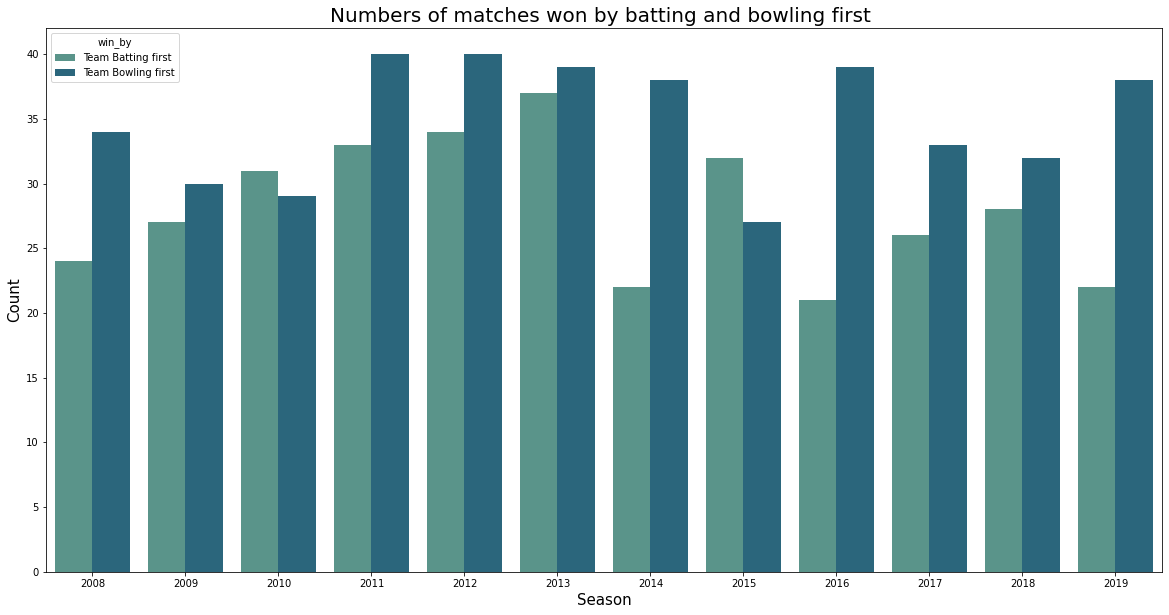

In [10]:
plt.figure(figsize = (20,10))
sns.countplot('season',hue='win_by', data=data, palette='crest')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

# Total matches won by indivisual teams

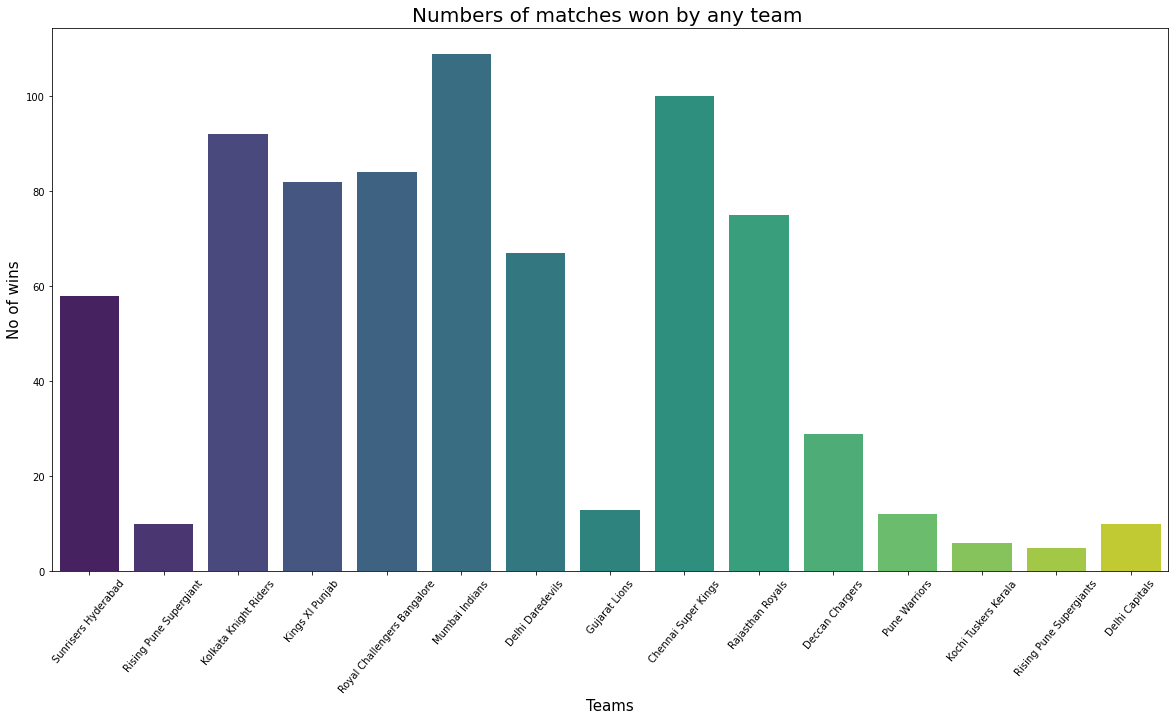

In [11]:
plt.figure(figsize = (20,10))
sns.countplot(x='winner',data=data, palette='viridis')
plt.title("Numbers of matches won by any team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

# Toss impact

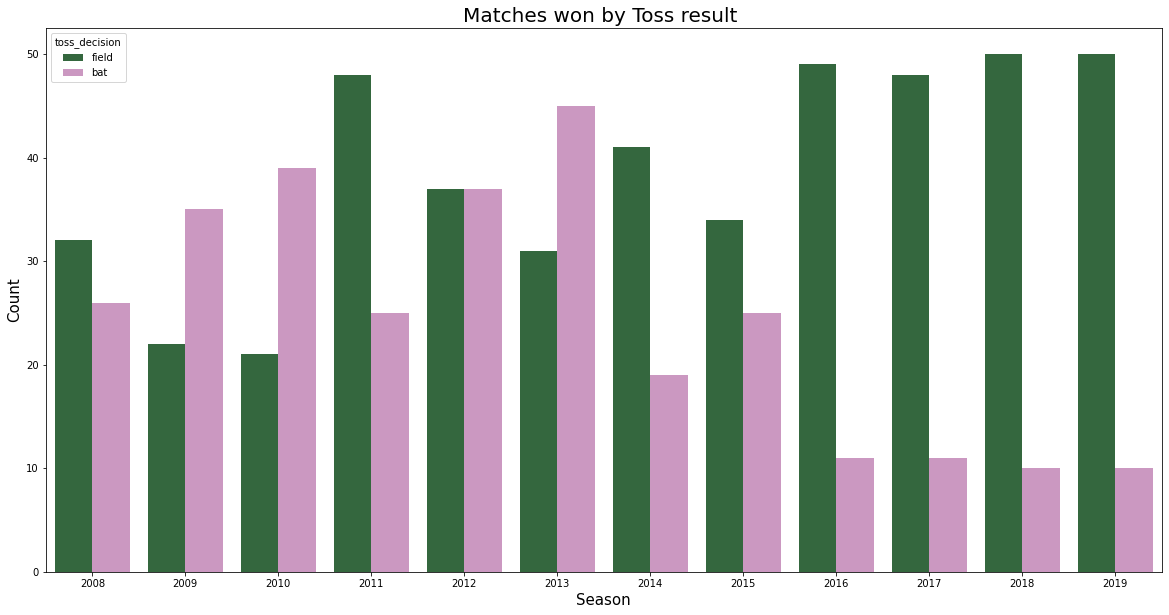

In [12]:
plt.figure(figsize = (20,10))
sns.countplot('season',hue='toss_decision',data=data,palette="cubehelix")
plt.title("Matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

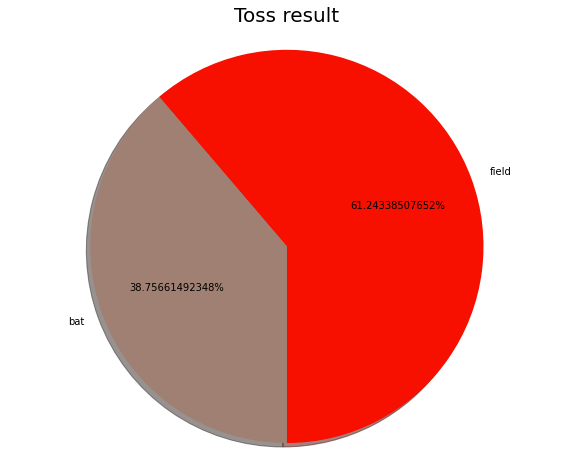

In [13]:
Tossdecision=data.toss_decision.value_counts()
labels=np.array(Tossdecision.index)
length = Tossdecision.values
colors = ['#F70F00', '#A08072']
plt.figure(figsize = (10,8))
plt.pie(length, labels=labels, colors=colors,
        autopct='%1.11f%%', shadow=True,startangle=-90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

# Toss impact in finals

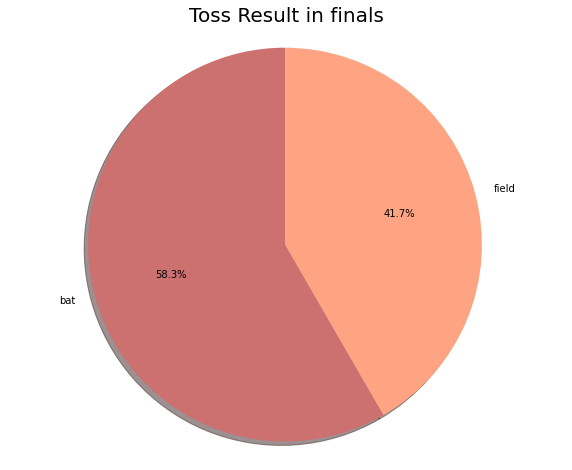

In [14]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#CC7070', '#FFA482']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result in finals',fontsize=20)
plt.axis('equal')
plt.show()

# Man of the match in finals

In [15]:
final_matches[['season','winner','player_of_match']].reset_index(drop=True).sort_values('season')

,season,winner,player_of_match
1,2008,Rajasthan Royals,YK Pathan
2,2009,Deccan Chargers,A Kumble
3,2010,Chennai Super Kings,SK Raina
4,2011,Chennai Super Kings,M Vijay
5,2012,Kolkata Knight Riders,MS Bisla
6,2013,Mumbai Indians,KA Pollard
7,2014,Kolkata Knight Riders,MK Pandey
8,2015,Mumbai Indians,RG Sharma
9,2016,Sunrisers Hyderabad,BCJ Cutting
0,2017,Mumbai Indians,KH Pandya


# Total fours by each team

In [16]:
fours=merge_data[merge_data['batsman_runs']==4]
fours.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


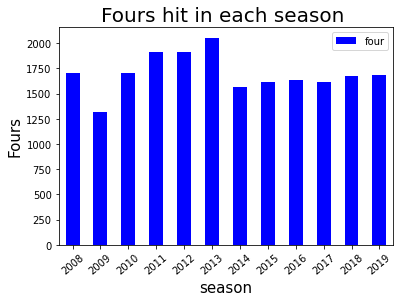

In [17]:
ax=fours.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'blue')
plt.title("Fours hit in each season ",fontsize=20)
plt.xticks(rotation=40)
plt.xlabel("season",fontsize=15)
plt.ylabel("Fours",fontsize=15)
plt.show()

# Total sixes by each team

In [18]:
six_data=merge_data[merge_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


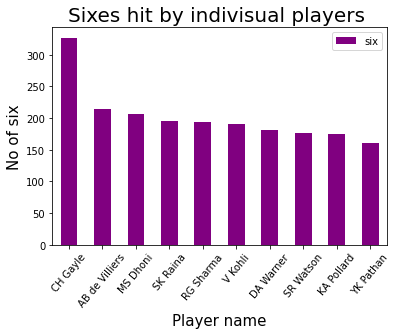

In [19]:
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='purple')
plt.title("Sixes hit by indivisual players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

In [20]:
super_overs = data.groupby("season")["result"].value_counts()
super_overs

season  result   
2008    normal       58
2009    normal       56
        tie           1
2010    normal       59
        tie           1
2011    normal       72
        no result     1
2012    normal       74
2013    normal       74
        tie           2
2014    normal       59
        tie           1
2015    normal       56
        no result     2
        tie           1
2016    normal       60
2017    normal       58
        tie           1
2018    normal       60
2019    normal       57
        tie           2
        no result     1
Name: result, dtype: int64

# Superovers played in each season

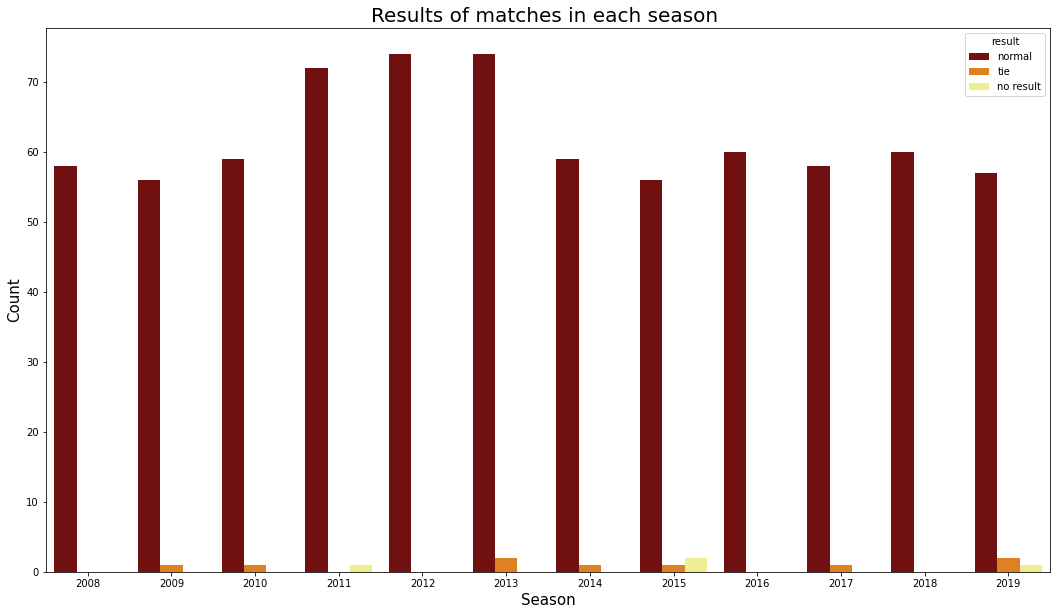

In [21]:
plt.figure(figsize = (18,10))
sns.countplot('season',hue='result',data=data,palette='afmhot')
plt.title("Results of matches in each season ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

# Man of the match winners

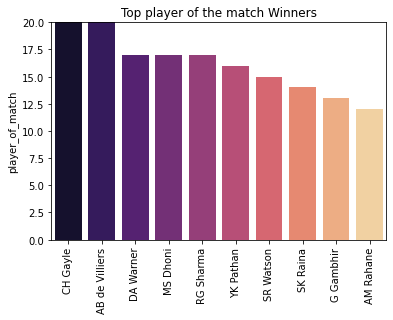

In [22]:
top_players = data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="magma");
plt.show()


# Top 10 run scorers

In [23]:
batsman_score=Data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


# Top 10 wicket takers

In [24]:
wicket_data=Data.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108
